In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import gym, rec_gym
import numpy as np
import tensorflow as tf

from rec_gym.runner import run_experiment
import gin
from rec_gym.envs import prim_env_v1, prim_env_v2

import pickle

In [5]:
gin.parse_config("""
PrimEnv1.n_items = 100
PrimEnv1.n_users = 10
PrimEnv1.n_rec   = 4
PrimEnv1.embedding_dimension = 2
PrimEnv1.cluster_var = 16
PrimEnv1.in_cluster_var = 4
PrimEnv1.user_change_prob = 0.05
PrimEnv1.reward_noise = 0
PrimEnv1.user_init_sigma = 4
PrimEnv1.user_ar_coef = 1
PrimEnv1.user_drift_sigma = 0
PrimEnv1.seed = 53
PrimEnv1.user_type = 'drifting'

PrimEnv2.n_items = 100
PrimEnv2.n_users = 10
PrimEnv2.n_rec   = 4
PrimEnv2.embedding_dimension = 2
PrimEnv2.cluster_var = 16
PrimEnv2.in_cluster_var = 4
PrimEnv2.user_change_prob = 0.05
PrimEnv2.reward_noise = 0
PrimEnv2.user_init_sigma = 4
PrimEnv2.user_ar_coef = 1
PrimEnv2.user_drift_sigma = 0
PrimEnv2.seed = 53
PrimEnv2.user_type = 'none'
PrimEnv2.new_items_interval = 1000
PrimEnv2.new_items_size = 0.
PrimEnv2.return_items_objects = False

""")

tf.reset_default_graph()
sess = tf.InteractiveSession()

def make_env():
    env = gym.make('prim-gym-v2')
    return env

In [7]:
from agents.ddpg import DDPGAgent 

Using TensorFlow backend.


In [8]:
env = make_env()

state_dim = env.embedding_dimension
action_dim = env.embedding_dimension
action_size = env.n_rec

agent = DDPGAgent(action_size = action_size,
                 state_dim = state_dim*10,
                 action_dim = action_dim,
                 gamma = .9,
                 sess = sess,
                 optimizer = tf.train.AdamOptimizer(
                     learning_rate=0.001
                 ),
                 max_tf_checkpoints_to_keep = 3,
                 experience_size = 1000,
                 batch_size = 64)

In [9]:
sess.run(tf.global_variables_initializer())
run_experiment(env, agent, t_train=1000, t_test=200)

  0%|          | 0/1000 [00:00<?, ?it/s]/media/anton/0b9d5a44-bb63-4de1-9cfe-0da47b81e88a/TPT/3A/PRIM Vente Privee/rec_gym/agents/ddpg.py:66: RuntimeWarning: invalid value encountered in true_divide
  return (x-np.min(x))/np.sum((x-np.min(x)))
/media/anton/0b9d5a44-bb63-4de1-9cfe-0da47b81e88a/TPT/3A/PRIM Vente Privee/rec_gym/agents/ddpg.py:67: RuntimeWarning: invalid value encountered in less
  actions_ids.append(np.random.choice(range(len(scores[i])), p=normalize(scores[i]) ))
100%|██████████| 200/200 [00:13<00:00, 14.69it/s]


In [7]:
with open('./logs/ddpg_no_random_init_env_finished.npy', 'wb') as f:
    pickle.dump(file=f, obj=env)

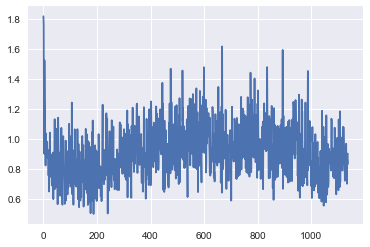

In [10]:
import matplotlib.pylab as plt
plt.plot(agent.td_losses)

In [11]:
for u in list(env.ps.values()):
    print(np.mean(np.array(u)))

0.00012564217753229456
0.008880640673944892
0.0005853475380428982
0.0008629899431413263
0.00841735577437225
0.04654045135658512
0.0023621388726827006
0.06970546731591706
0.01802597498428697
0.0009294668197374805


In [9]:
env.bought_items

defaultdict(set,
            {292: {144, 240, 259, 392, 722},
             217: {4,
              49,
              90,
              100,
              130,
              254,
              291,
              312,
              327,
              616,
              724,
              744,
              764,
              814,
              835,
              851,
              945},
             136: {28, 30, 115, 454, 618},
             209: {334, 834},
             188: {396},
             108: {565},
             273: {174},
             162: {612},
             50: {179, 203, 222, 343, 602, 632, 761, 782, 875, 927, 942},
             261: {37, 117, 384, 550},
             243: {555, 813, 936},
             282: {272, 281, 283, 314, 323, 518, 636, 653, 898},
             22: {2, 250, 546, 663},
             268: {286},
             87: {28,
              34,
              73,
              102,
              163,
              254,
              291,
              316,
            

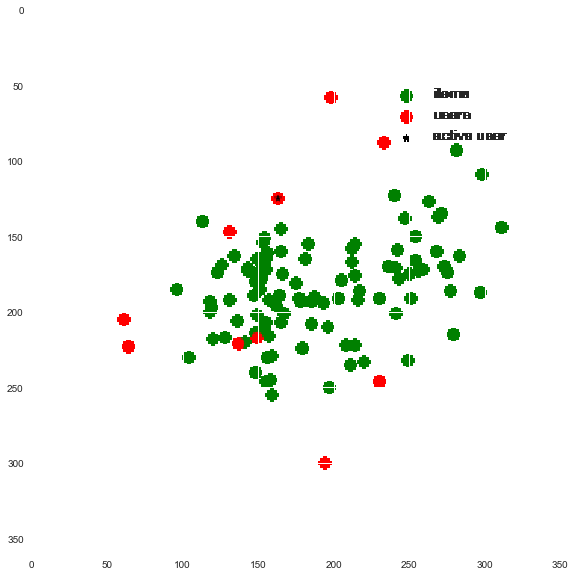

In [12]:
plt.figure(figsize=(10, 10))
plt.imshow(env.render(mode='rgb_array'))

In [13]:
from agents.utils import data_exploring_widget
data_exploring_widget(env)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Time:', max=1200), Output()), _…

In [15]:
from agents.baselines import RandomAgent

env = make_env()

state_dim = env.embedding_dimension
action_dim = env.embedding_dimension
action_size = env.n_rec

agent = RandomAgent(action_size = action_size)

In [16]:
sess.run(tf.global_variables_initializer())
run_experiment(env, agent, t_train=10000, t_test=2000)

100%|██████████| 2000/2000 [00:01<00:00, 1284.89it/s]


In [17]:
from agents.utils import data_exploring_widget
data_exploring_widget(env)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Time:', max=12000), Output()), …

In [14]:
from agents.dqn import Qagent

env = make_env()

state_dim = env.embedding_dimension
action_dim = env.embedding_dimension
action_size = env.n_rec

agent = Qagent(sess=sess,
                 state_dim=(state_dim*10,),
                 action_dim=(action_dim,),
                 epsilon=0.4,
                 action_size=action_size,
                 logdir='./logs/',
                 replay_size=1000,
                 batch_size=2)

In [15]:
sess.run(tf.global_variables_initializer())
run_experiment(env, agent, t_train=1000, t_test=200)

100%|██████████| 200/200 [00:00<00:00, 296.22it/s]


In [16]:
from agents.utils import data_exploring_widget
data_exploring_widget(env)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Time:', max=1200), Output()), _…